In [1]:
import matplotlib.pyplot as plt, numpy as np

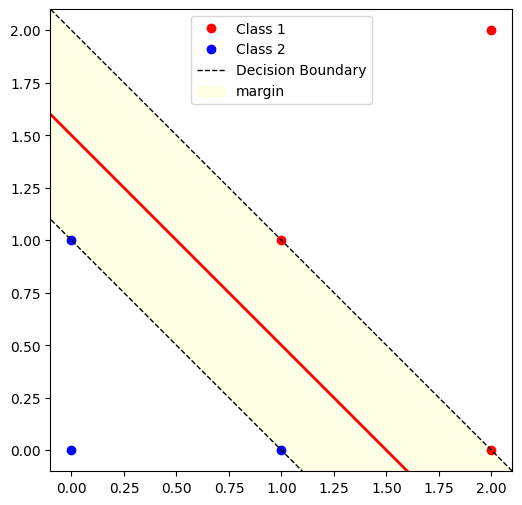

In [82]:
from cProfile import label


x1 = [1, 2, 2]; y1 = [1, 2, 0]
x2 = [0, 1, 0]; y2 = [0, 0, 1]

array1 = np.linspace(-0.5, 2.5, 100)

plt.figure(figsize=(6, 6))
plt.plot(x1, y1, 'ro', label='Class 1')
plt.plot(x2, y2, 'bo', label='Class 2')
plt.plot(array1, 1 - array1, 'k--', linewidth=1, label='Decision Boundary')
plt.plot(array1, 2 - array1, 'k--', linewidth=1)
plt.plot(array1, 1.5 - array1, 'r', linewidth=2)
plt.fill_between(array1, 1 - array1, 2 - array1, color='#ffffcc', alpha=0.5, label='margin')
plt.axis('square')
plt.axis([-0.1, 2.1, -0.1, 2.1])
plt.legend()

plt.savefig('plot.png', dpi=180)
plt.show()

In [77]:
from sklearn import svm

X = [[1, 1], [2, 2], [2, 0], [0, 0], [1, 0], [0, 1]]
y = [1, 1, 1, -1, -1, -1]

clf = svm.SVC(kernel='linear')
clf.fit(X, y)

SVC(kernel='linear')

In [79]:
w = clf.coef_[0]; a = -w[0] / w[1]
xx = np.linspace(-0.5, 2.5)
yy = a * xx - (clf.intercept_[0]) / w[1]

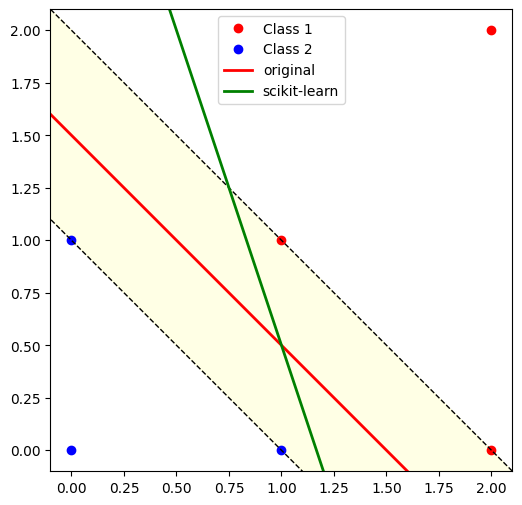

In [84]:
plt.figure(figsize=(6, 6))
plt.plot(x1, y1, 'ro', label='Class 1')
plt.plot(x2, y2, 'bo', label='Class 2')
plt.plot(array1, 1 - array1, 'k--', linewidth=1)
plt.plot(array1, 2 - array1, 'k--', linewidth=1)
plt.plot(array1, 1.5 - array1, 'r', linewidth=2, label='original')
plt.plot(array1, - clf.intercept_ / w[1] + a * array1, 'g', linewidth=2, label='scikit-learn')
plt.fill_between(array1, 1 - array1, 2 - array1, color='#ffffcc', alpha=0.5)
plt.axis('square')
plt.axis([-0.1, 2.1, -0.1, 2.1])
plt.legend()

plt.savefig('sklearn.png', dpi=180)
plt.show()

In [28]:
clf.coef_, clf.intercept_

plt.figure(figsize=(6, 6))
plt.plot(x1, y1, 'ro', label='Class 1')
plt.plot(x2, y2, 'bo', label='Class 2')
plt.plot(array1, 1 - array1, 'k--', linewidth=1)
plt.plot(array1, 2 - array1, 'k--', linewidth=1)
plt.plot(array1, 1.5 - array1, 'r', linewidth=2)
plt.fill_between(array1, 1 - array1, 2 - array1, color='#ffffcc', alpha=0.5)
plt.axis('square')
plt.axis([-0.1, 2.1, -0.1, 2.1])


(array([[1.2, 0.4]]), array([-1.4]))

\begin{aligned}
\max_{\boldsymbol{\alpha}} \quad & \sum_{i=1}^N \alpha_i - \frac{1}{2}\sum_{i=1}^N\sum_{j=1}^N \alpha_i \alpha_j y_i y_j \boldsymbol{x}_i^T \boldsymbol{x}_j \\
\text{s.t.} \quad & \sum_{i=1}^N \alpha_i y_i = 0 \\
& \alpha_i \geq 0, \quad i = 1, 2, \cdots, N.
\end{aligned}

\begin{cases}
\alpha_i \geq 0 \\
1 - y_i(\boldsymbol{w}^T \boldsymbol{x}_i + b) \leq 0 \\
\alpha_i(1 - y_i(\boldsymbol{w}^T \boldsymbol{x}_i + b)) = 0 \\
\end{cases}

In [8]:
alphas = np.random.randn(6)
alphas

array([-2.82822794, -1.94332588, -1.72198686,  0.96555437, -1.04966939,
       -3.03445987])

$$
\boldsymbol{w}^\ast = \sum_{i=1}^N \alpha_i y_i \boldsymbol{x}_i
$$

$$
b^\ast = y_j - \left(\sum_{i=1}^N \alpha_i y_i \boldsymbol{x}_i^T\right) \boldsymbol{x}_j \\
\text{for some } j \text{ s.t. } y_j(\boldsymbol{w}^\ast \boldsymbol{x}_j + b^\ast) = 1
$$

In [17]:
def check_kkt(x: np.ndarray, y: float, alpha: float, w: np.ndarray, b: np.ndarray, tol=1e-5) -> bool:
    """Check the KKT conditions for a given alpha."""
    if alpha < tol:
        return False
    if (1 - y * (w.T @ x) + b) > tol:
        return False
    if alpha @ (y * (w.T @ x) - b) > tol:
        return False
    if alpha @ (y * (w.T @ x) - b) < tol:
        return False
    return True

In [ ]:
def f(index: int, alphas: np.ndarray, x: np.ndarray, y: np.ndarray) -> float:
    """Compute the objective function."""
    return alphas[index][0] * y[index][0] * x[index].T @ y.T @ x

In [18]:
x = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1],
    [2, 0],
    [2, 2],
])

y = np.array([-1, -1, -1, 1, 1, 1]).reshape(-1, 1)

alphas = np.random.rand(6, 1)
w = np.array([1, 1.5]).reshape(-1, 1)
b = 

In [19]:
def error(w, b, x, y):
    return y - (w.T @ x + b)

def K(x1, x2):
    return x1.T @ x1 + x2.T @ x2 - 2 * x1.T @ x2

In [20]:
check_kkt(x[0], y[0], alphas[0], w, 0)

False

In [ ]:
1 - y * (w.T @ x) + b